In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\GargiData\\FinalTrainSet.csv')

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data-Preprocessing

In [17]:
data = data.apply(pd.to_numeric, errors='coerce') # converted object to floats. 

In [18]:
#check for nan,infinite values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [19]:
import numpy as np

In [20]:
data = clean_dataset(data)

In [21]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0.0


In [22]:
ytrain=data.iloc[:,115]

In [23]:
data= data.drop(columns=['Attack'])

In [24]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [25]:
xtrain=data.iloc[:,:]

In [26]:
xtrain.shape

(119998, 115)

In [27]:
tdata=pd.read_csv('C:\\Users\\hp\\Desktop\\GargiData\\FinalTestSet.csv')

In [28]:
tdata = tdata.apply(pd.to_numeric, errors='coerce')

In [29]:
tdata = clean_dataset(tdata)

In [30]:
tdata.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0.0
1,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,...,0.0,0.0,6.087070,338.794642,8.566964,338.794642,73.392866,0.0,0.0,0.0
2,1.920484,328.248423,35.938286,1.951502,328.149109,35.977767,1.983566,328.049712,35.997529,1.998344,...,0.0,0.0,7.086062,338.118012,8.113068,338.118012,65.821880,0.0,0.0,0.0
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0.0
4,1.973903,71.145433,120.978849,1.984259,71.087263,120.992385,1.994725,71.029088,120.999154,1.999471,...,0.0,0.0,1.000000,82.000000,0.000000,82.000000,0.000000,0.0,0.0,0.0


In [31]:
ytest=tdata.iloc[:,115]

In [32]:
tdata= tdata.drop(columns=['Attack'])

In [33]:
tdata.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,...,98.876425,0.0,0.0,6.087070,338.794642,8.566964,338.794642,73.392866,0.0,0.0
2,1.920484,328.248423,35.938286,1.951502,328.149109,35.977767,1.983566,328.049712,35.997529,1.998344,...,68.485757,0.0,0.0,7.086062,338.118012,8.113068,338.118012,65.821880,0.0,0.0
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
4,1.973903,71.145433,120.978849,1.984259,71.087263,120.992385,1.994725,71.029088,120.999154,1.999471,...,0.000000,0.0,0.0,1.000000,82.000000,0.000000,82.000000,0.000000,0.0,0.0


In [34]:
xtest=tdata.iloc[:,:]

In [35]:
xtest.shape

(39999, 115)

# Selecting best 6 features using Lasso Regression to identify true features on which output is based

In [43]:
%matplotlib inline    
from IPython.display import display   

def report_coef_value(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept value is: {}".format(intercept))
    r['coef'].plot(figsize=(20,10),kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

In [ ]:
import numpy as np
from sklearn import metrics
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
ls_regressor = Lasso(alpha=0.1)

# Fit/train LASSO
ls_regressor.fit(xtrain,ytrain)
# Predict
pred = ls_regressor.predict(xtest)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print("Final score (RMSE): {}".format(score))

names = list(data.columns.values)

report_coef_value(
  names,
  ls_regressor.coef_,
  ls_regressor.intercept_)

In [ ]:
newdata = data[['HH_L3_weight','MI_dir_L1_mean','HH_L1_std','HH_jit_L3_weight','HH_L0.1_mean','HH_L3_std']]

In [ ]:
newdata.head()

In [27]:
nor_xtrain = StandardScaler()
x_train = nor_xtrain.fit_transform(newdata.iloc[:,:].values)

In [28]:
tdata=tdata[['HH_L3_weight','MI_dir_L1_mean','HH_L1_std','HH_jit_L3_weight','HH_L0.1_mean','HH_L3_std']]

In [29]:
tdata.head()

,HH_L3_weight,MI_dir_L1_mean,HH_L1_std,HH_jit_L3_weight,HH_L0.1_mean,HH_L3_std
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000
1,1.000058,322.000000,3.789325,1.000058,333.059988,0.152442
2,1.951558,328.049712,6.238371,1.951558,333.350705,5.998515
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000
4,1.000000,71.029088,0.000000,1.000000,82.000000,0.000000


In [30]:
nor_xtest = StandardScaler()
x_test = nor_xtest.fit_transform(tdata.iloc[:,:].values)

# Using Tensorflow for fully connected neural network

In [31]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [49]:
model = Sequential()

#Deep Neural network
model.add(Dense(3, input_dim = 6,activation='relu')) #hidden 1
model.add(Dense(3, activation='relu'))#hidden 2
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [50]:
x_test=np.asarray(x_test)

In [51]:
x_train=np.asarray(x_train)

In [52]:
ytrain= np.asarray(ytrain)

In [53]:
ytest=np.asarray(ytest)

In [54]:
import os
model.fit(x_train, ytrain,validation_data=(x_test,ytest),callbacks=[monitor],verbose=2,epochs=10)

Train on 119998 samples, validate on 39999 samples
Epoch 1/10
119998/119998 - 32s - loss: 0.3926 - accuracy: 0.7982 - val_loss: 0.8352 - val_accuracy: 0.8721
Epoch 2/10
119998/119998 - 29s - loss: 0.2911 - accuracy: 0.8407 - val_loss: 1.1015 - val_accuracy: 0.8698
Epoch 3/10
119998/119998 - 28s - loss: 0.2846 - accuracy: 0.8411 - val_loss: 1.1749 - val_accuracy: 0.8707
Epoch 4/10
119998/119998 - 28s - loss: 0.2828 - accuracy: 0.8416 - val_loss: 1.1365 - val_accuracy: 0.8758
Epoch 5/10
119998/119998 - 29s - loss: 0.2818 - accuracy: 0.8425 - val_loss: 1.1184 - val_accuracy: 0.8690
Epoch 6/10
119998/119998 - 29s - loss: 0.2811 - accuracy: 0.8421 - val_loss: 1.1111 - val_accuracy: 0.8658
Epoch 00006: early stopping


In [55]:
pred = model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(ytest, pred.round())
cm

array([[15356,  4644],
       [  724, 19275]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(ytest, pred.round()))

Accuracy:  0.8657966449161228


In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred.round()))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85     20000
         1.0       0.81      0.96      0.88     19999

    accuracy                           0.87     39999
   macro avg       0.88      0.87      0.86     39999
weighted avg       0.88      0.87      0.86     39999



In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

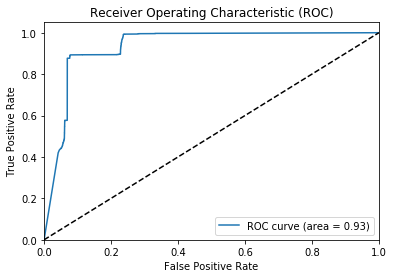

In [62]:
plot_roc(pred,ytest)

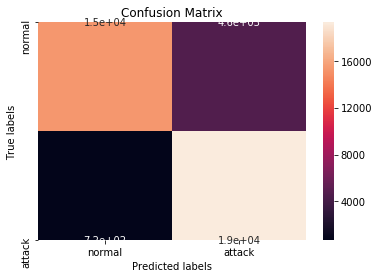

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['normal', 'attack']); ax.set_yticklabels(['normal', 'attack']);